# <center> Predicting Football Match Results using Machine Learning </center>
#### <center> Dados e Aprendizagem Automática - Mestrado em Engenharia Informática </center>
##### <center> 2023 - Universidade do Minho </center>

<p style='text-align: center;'>Group 44:
   <br>
   Duarte Parente (PG53791)
   <br>
   Gonçalo Pereira (PG53834)
   <br>
   José Moreira (PG53963)
   <br>
   Santiago Domingues (PG54225)
</p>

***

## Problem Definition

- #### Background
As one of the most popular sports on the planet, football has always been followed very closely by a large number of people. However, with technological advancements, particularly in the field of data science, we have witnessed its growing impact on the world of football. 

- #### Motivation
A football match has 3 possible outcomes for a participating team: **win**, **lose** or **draw**. Consequently, such a limited set of options might lead to the misconception that predicting the match result is nearly straighforward. One of the reasons this sport is cherished by many is its inherent element of unpredictability, where seemingly random or improbable events can take place. The abundance of data collected during a football match makes its utilization imperative for conducting various analyses regarding the game itself and its intervinients, allowing the exploration of Machine Learning techniques to predict the outcome of this events.

- #### Objectives
    * Find a good quality dataset with enough in-game statistics of football matches.
    * Create a Machine Learning model capable of predicting football match outcomes.


## Import Libraries

In [82]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
%matplotlib inline

## Data Ingestion

The chosen dataset contains game statistics from 2014-2020, covering every game from the top 5 european leagues over the specified time window: **Premier League** (Liga Inglesa), **Serie A** (Liga Italiana), **Bundesliga** (Liga Alemã), **La Liga** (Liga Espanhola) e **Ligue 1** (Liga Francesa).

- https://www.kaggle.com/datasets/technika148/football-database/?select=teamstats.csv

In [83]:
# Read the dataset
df = pd.read_csv('data/teamstats.csv')

print(f"The dataset has statistics from {df.shape[0]} games and {df.shape[1]} features.")

df.columns

The dataset has statistics from 25360 games and 15 features.


Index(['gameID', 'teamID', 'season', 'date', 'location', 'xGoals', 'shots',
       'shotsOnTarget', 'deep', 'ppda', 'fouls', 'corners', 'yellowCards',
       'redCards', 'result'],
      dtype='object')

In [84]:
df.head()

,gameID,teamID,season,date,location,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result
0,81,89,2015,2015-08-08 15:45:00,h,0.627539,9,1,4,13.8261,12,1,2.0,0,W
1,81,82,2015,2015-08-08 15:45:00,a,0.674600,9,4,10,8.2188,12,2,3.0,0,L
2,82,73,2015,2015-08-08 18:00:00,h,0.876106,11,2,11,6.9000,13,6,3.0,0,L
3,82,71,2015,2015-08-08 18:00:00,a,0.782253,7,3,2,11.8462,13,3,4.0,0,W
4,83,72,2015,2015-08-08 18:00:00,h,0.604226,10,5,5,6.6500,7,8,1.0,0,D


#### Features in the Dataset

- **gameID**: Unique identifier for each game.
- **teamID**: Unique identifier for each team.
- **season**: Football season during when the game took place.
- **date**: Date of the game.
- **location**: Home or away game. 
- **xGoals**: Estimatation of the number of goals the team should have scored.
- **shots**: Number of shots attempted.
- **shotsOnTarget**: Shots on Target.
- **deep**: Passes completed within an estimated distance of 20 yards of goal (crosses excluded).
- **ppda**: Passes allowed per defensive action in opposition half.
- **fouls**: Number of fouls commited by the team.
- **corners**: Number of corner kicks awarded to the team.
- **yellowCards**: Number of yellow cards received by players of the team.
- **redCards**: Number of red cards received by players of the team.
- **result**: (Target): Outcome of the game, indicating whether the team won, lost, or draw.

****

## Data Exploration

### Describing data

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25360 entries, 0 to 25359
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gameID         25360 non-null  int64  
 1   teamID         25360 non-null  int64  
 2   season         25360 non-null  int64  
 3   date           25360 non-null  object 
 4   location       25360 non-null  object 
 5   xGoals         25360 non-null  float64
 6   shots          25360 non-null  int64  
 7   shotsOnTarget  25360 non-null  int64  
 8   deep           25360 non-null  int64  
 9   ppda           25360 non-null  float64
 10  fouls          25360 non-null  int64  
 11  corners        25360 non-null  int64  
 12  yellowCards    25359 non-null  float64
 13  redCards       25360 non-null  int64  
 14  result         25360 non-null  object 
dtypes: float64(3), int64(9), object(3)
memory usage: 2.9+ MB


- From the **15** features, **12** are numerical and **3** are nominal. 

In [86]:
# Numeric Features
df.describe()

,gameID,teamID,season,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards
count,25360.000000,25360.000000,25360.000000,25360.000000,25360.000000,25360.000000,25360.000000,25360.000000,25360.000000,25360.000000,25359.000000,25360.000000
mean,7877.707334,135.329180,2016.984148,1.340431,12.461751,4.317468,5.820465,11.165713,12.955560,4.977721,2.032257,0.103194
std,4753.680315,42.762037,2.000036,0.851634,5.123449,2.471407,4.050207,6.337107,4.204289,2.831523,1.367856,0.322466
min,81.000000,71.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,1.897400,0.000000,0.000000,0.000000,0.000000
25%,3812.750000,101.000000,2015.000000,0.701658,9.000000,3.000000,3.000000,7.103200,10.000000,3.000000,1.000000,0.000000
50%,7981.500000,132.000000,2017.000000,1.184050,12.000000,4.000000,5.000000,9.720000,13.000000,5.000000,2.000000,0.000000
75%,12023.250000,163.000000,2019.000000,1.813830,16.000000,6.000000,8.000000,13.400000,16.000000,7.000000,3.000000,0.000000
max,16135.000000,262.000000,2020.000000,6.630490,47.000000,18.000000,42.000000,152.000000,33.000000,20.000000,9.000000,3.000000


In [87]:
# Nominal Features
df.describe(include=object)

,date,location,result
count,25360,25360,25360
unique,6834,2,3
top,2019-05-12 14:00:00,h,W
freq,26,12680,9508


### Data Visualization

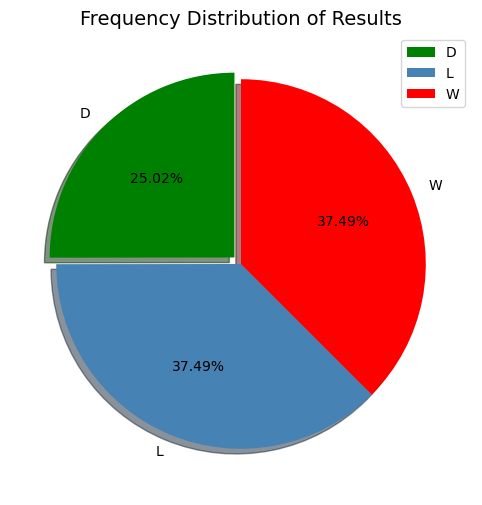

In [88]:
colors = ['green', 'steelblue', 'red'] 
explode = (0.05, 0, 0) 

df.groupby(['result']).sum().plot(kind='pie', y='season', autopct='%1.2f%%', shadow=True, colors=colors, explode=explode, startangle=90, figsize=(10,6))
plt.title('Frequency Distribution of Results', fontsize=14)
plt.ylabel('')
plt.show()

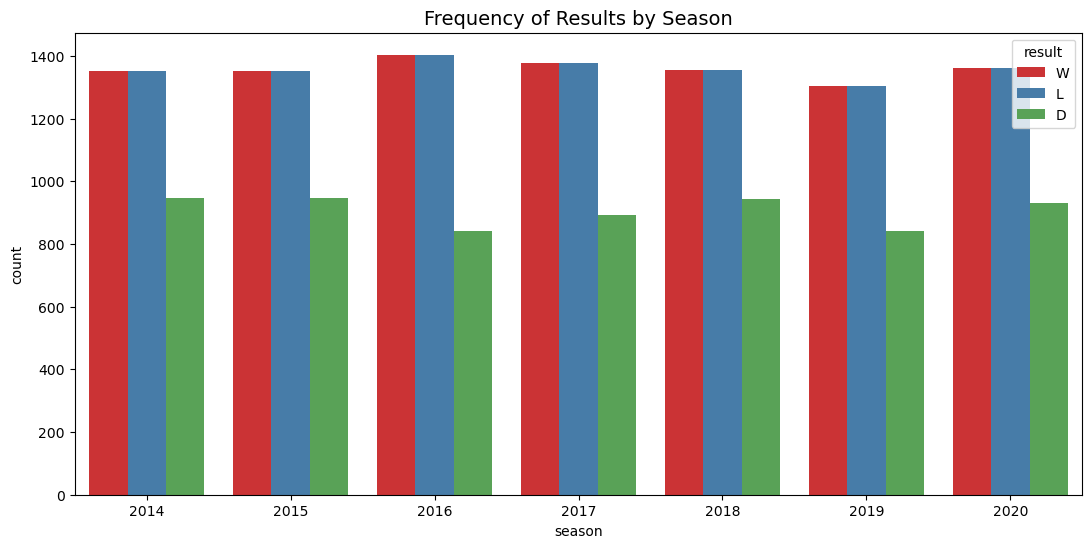

In [89]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df, x='season', hue='result', palette='Set1')
plt.title('Frequency of Results by Season', fontsize=14)
plt.show()

/home/santi/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


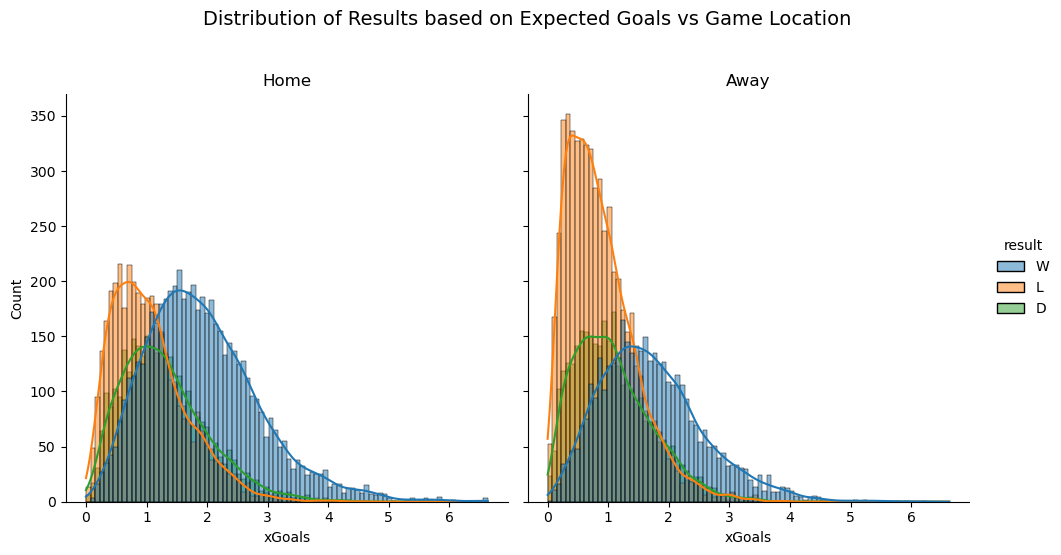

In [90]:
g = sns.displot(data=df, x="xGoals", hue="result", col="location", kde=True)
g.set_titles(row_template="")

custom_colnames = ["Home", "Away"]
for i, ax in enumerate(g.axes[0]):
    ax.set_title(custom_colnames[i], fontsize=12) 
plt.gcf().suptitle("Distribution of Results based on Expected Goals vs Game Location", y=1.10, fontsize=14)
plt.show()

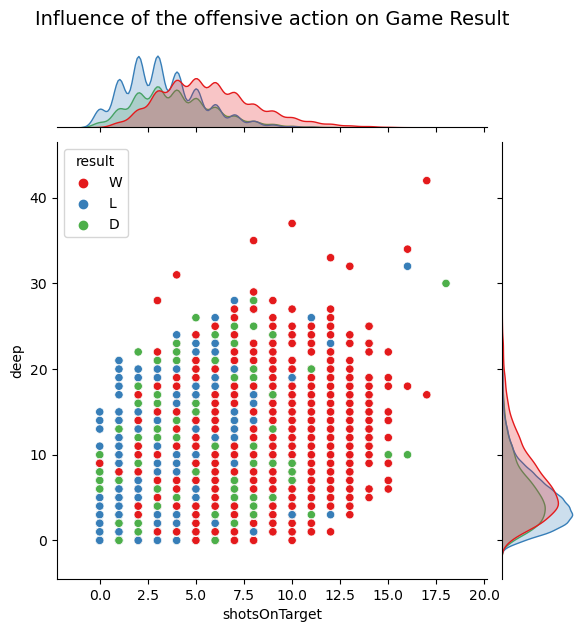

In [91]:
sns.jointplot(data=df, x="shotsOnTarget", y="deep", hue='result', palette='Set1')
plt.title('Influence of the offensive action on Game Result', y=1.25, fontsize=14)
plt.show()

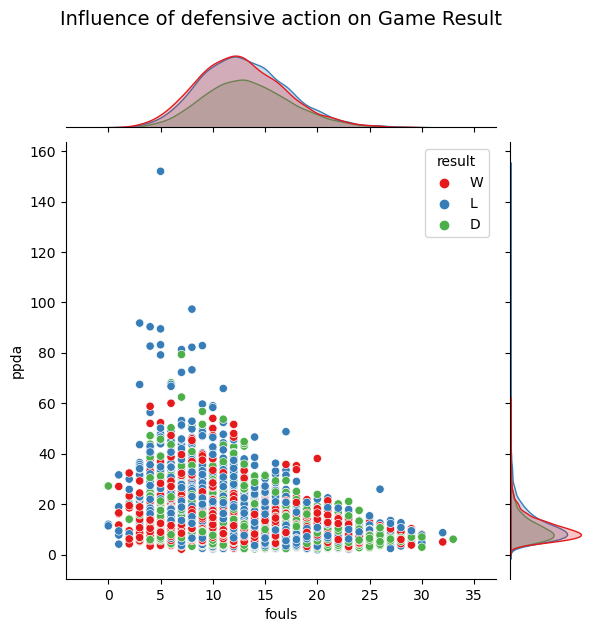

In [92]:
sns.jointplot(data=df, x="fouls", y="ppda", hue='result', palette='Set1')
plt.title('Influence of defensive action on Game Result', y=1.25, fontsize=14)
plt.show()

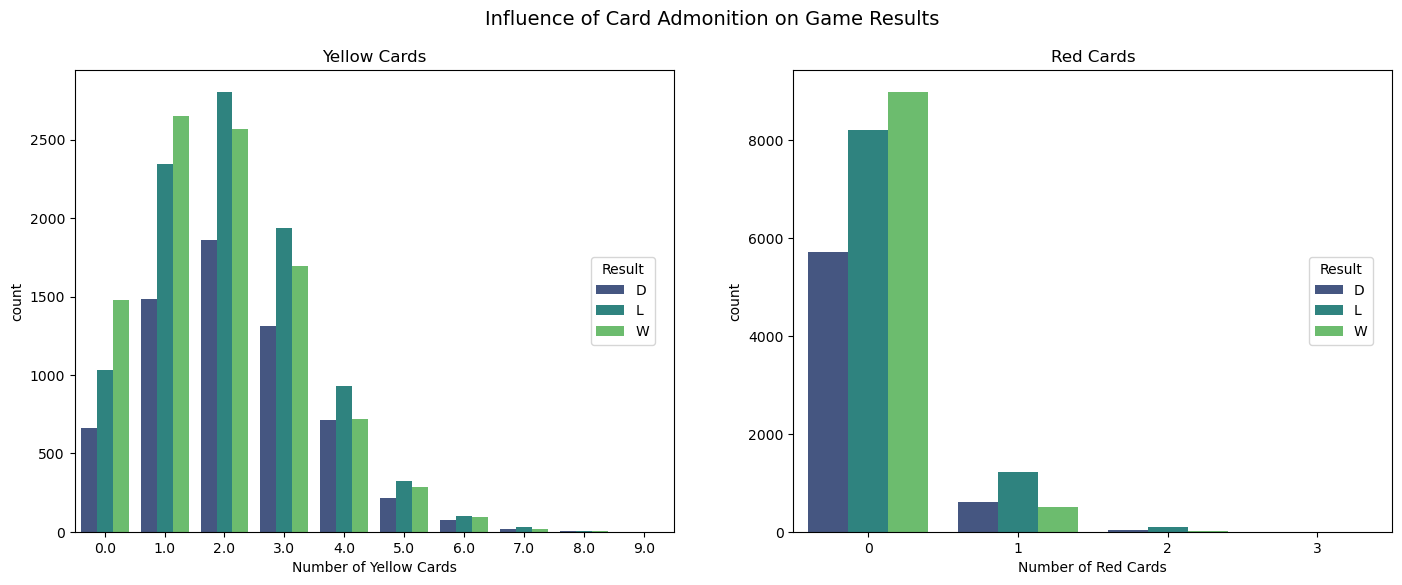

In [93]:
plt.figure(figsize=(17, 6))

df_count_yellow = df.groupby(['yellowCards', 'result']).size().reset_index(name='count')

plt.subplot(1, 2, 1)
sns.barplot(data=df_count_yellow, x='yellowCards', y='count', hue='result', palette='viridis', errorbar=None)
plt.xlabel('Number of Yellow Cards')
plt.title('Yellow Cards')
plt.legend(title='Result', bbox_to_anchor=(0.85, 0.5), loc='center left')

df_count_red = df.groupby(['redCards', 'result']).size().reset_index(name='count')

plt.subplot(1, 2, 2)
sns.barplot(data=df_count_red, x='redCards', y='count', hue='result', palette='viridis', errorbar=None)
plt.xlabel('Number of Red Cards')
plt.title('Red Cards')

plt.legend(title='Result', bbox_to_anchor=(0.85, 0.5), loc='center left')
plt.suptitle('Influence of Card Admonition on Game Results', fontsize=14)

plt.show()


****

## Data preparation

### Handling Dates

- The feature **date** is an object in the format **%Y-%m-%d %H:%M:%S**, therefore its elements are going to be subdivised and added to the dataset as new features.

In [94]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d %H:%M:%S', errors='coerce')

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minutes'] = df['date'].dt.minute
df['seconds'] = df['date'].dt.second

df = df.drop(['date'], axis=1)

### Handling missing data

In [95]:
# Checking for missing values
df.isnull().sum()

gameID           0
teamID           0
season           0
location         0
xGoals           0
shots            0
shotsOnTarget    0
deep             0
ppda             0
fouls            0
corners          0
yellowCards      1
redCards         0
result           0
year             0
month            0
day              0
hour             0
minutes          0
seconds          0
dtype: int64

In [96]:
df[df['yellowCards'].isnull()]

,gameID,teamID,season,location,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result,year,month,day,hour,minutes,seconds
8280,4888,95,2014,h,0.355629,8,3,2,8.1923,11,1,NaN,1,D,2015,3,2,19,45,0


There is only 1 missing value in the entire dataset, specifically corresponding to the number of yellow cards received by the Team **95 (Roma)** in Game **4888 (vs Juventus)**. To fill in this value, official information about the game in question was consulted for accuracy and completeness.
- https://www.zerozero.pt/jogo.php?id=3636519 (Roma had 6 yellow cards)

In [97]:
## Filling missing value with accurate number
df.fillna(6, inplace=True)

df[df['yellowCards'].isnull()]

,gameID,teamID,season,location,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result,year,month,day,hour,minutes,seconds


### Checking for unique values

In [98]:
df.nunique()

gameID           12680
teamID             146
season               7
location             2
xGoals           24687
shots               42
shotsOnTarget       19
deep                38
ppda              6789
fouls               33
corners             21
yellowCards         10
redCards             4
result               3
year                 8
month               12
day                 31
hour                18
minutes              9
seconds              1
dtype: int64

In [99]:
df['seconds'].unique()

array([0], dtype=int32)

- The feature **seconds** has only 1 unique value (0), so this feature will be dropped.

In [100]:
df = df.drop(['seconds'], axis=1)

### Handling Categorical Data
- Method: **Label Encoding**

In [101]:
lbe = LabelEncoder()

df['result'] = lbe.fit_transform(df['result'])
df['location'] = lbe.fit_transform(df['location'])

df.head()

,gameID,teamID,season,location,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result,year,month,day,hour,minutes
0,81,89,2015,1,0.627539,9,1,4,13.8261,12,1,2.0,0,2,2015,8,8,15,45
1,81,82,2015,0,0.674600,9,4,10,8.2188,12,2,3.0,0,1,2015,8,8,15,45
2,82,73,2015,1,0.876106,11,2,11,6.9000,13,6,3.0,0,1,2015,8,8,18,0
3,82,71,2015,0,0.782253,7,3,2,11.8462,13,3,4.0,0,2,2015,8,8,18,0
4,83,72,2015,1,0.604226,10,5,5,6.6500,7,8,1.0,0,0,2015,8,8,18,0


****

## Correlation Analysis

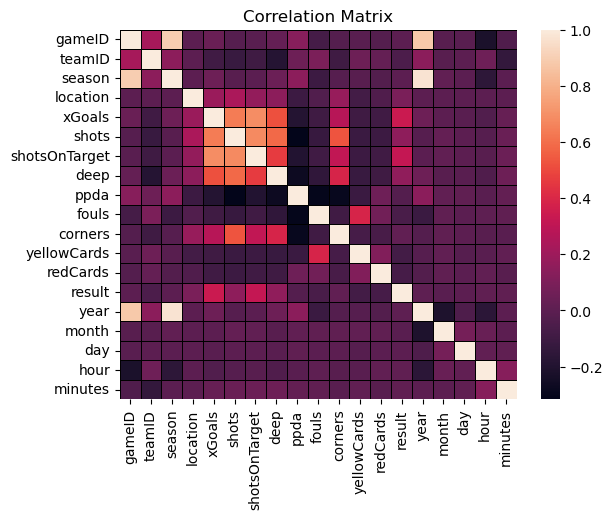

In [102]:
correlation = df.corr(method='pearson')
sns.heatmap(correlation, linecolor='black', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- Analyzing the presented correlation matrix, it is observed that the **year** feature shows an excessively high correlation coefficient with **season** and **gameID** and therefore, it will be **removed**.
- Through domain knowledge and supported by the practically null correlation value of the **day** and **minutes** features, these will also be **removed**.

In [103]:
df = df.drop(['year', 'day', 'minutes'], axis=1)

****
## Feature Importance with Logistic Regression
Using Logistic Regression to sort which features have the highest predictive potential 

In [104]:
## Features need to be scaled
scaler = StandardScaler()

In [105]:
X = df.drop(['result'], axis=1)
y = df['result']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=11)

In [107]:
# Multinomial Logistic Regression
lr = LogisticRegression(multi_class='multinomial', solver = 'newton-cg')

In [108]:
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr.fit(X_scaled, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In multiclass logistic regression, **distinct sets of coefficients** are assigned to each class. Therefore, feature importance can be calculatedby taking the **average** of the absolute values of the coefficients across all classes.

In [109]:
feature_names = list(X)

feature_importance = np.mean(np.abs(lr.coef_), axis=0)

fti_dict = dict(zip(feature_names, feature_importance))

sorted_fti = sorted(fti_dict.items(), key=lambda x: x[1])

features = [[feature for feature, _ in sorted_fti],[importance for _, importance in sorted_fti]]

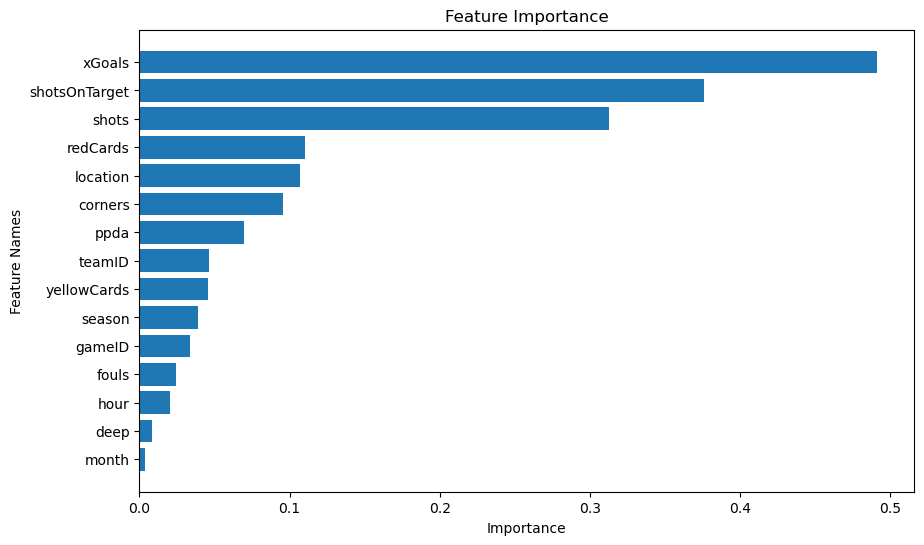

In [110]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(features[0], features[1])
plt.xlabel('Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance')
plt.show()

### Performance Evaluation

In [111]:
predictions = lr.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.36      0.02      0.04      1907
           1       0.53      0.78      0.63      2826
           2       0.63      0.73      0.67      2875

    accuracy                           0.57      7608
   macro avg       0.51      0.51      0.45      7608
weighted avg       0.52      0.57      0.50      7608



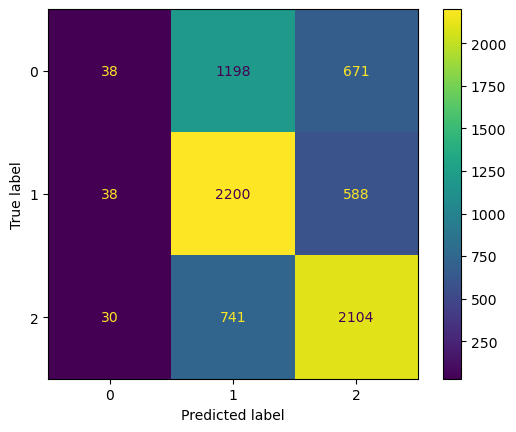

In [112]:
print(classification_report(y_test,predictions))

confusion_matrix = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix).plot()
plt.grid(False)
plt.show()

- Dropping features that show poor predictive power

In [113]:
#df = df.drop(['month'], axis=1)

***
## Modeling

Building a pipeline for **model testing** and **hyperparameter tuning**.

In [114]:
## Models and hyperparameters definition

models = {
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVM': SVC(),
}

params = {
    'DecisionTree':{'criterion': ['gini','entropy'], 'max_depth':range(1,10), 'min_samples_split':range(2,10), 'min_samples_leaf':range(1,5)},
    'RandomForestClassifier': { 'n_estimators': [16, 32, 100, 200] , 'criterion': ['gini','entropy'],  'max_depth':range(3,10), 'min_samples_split':range(2,10)},
    'SVM': [{'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.1, 0.01, 0.001]}]
}

In [115]:
class ModelingPipeline:

    ## Initialing Pipeline with all models and respective hyperparameters
    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.grids = {}
        self.predictions = {}  

    
    def fit(self, X_train, y_train, cv):
        model_counter = 1

        for key in self.models.keys():
            print("[%d/%d] Running Hyperparameter Tuning for %s." % (model_counter, len(self.models), key))
            model = self.models[key]
            params = self.params[key]
            grid = GridSearchCV(model, params, cv=cv, verbose=1, refit=True, return_train_score=True)
            grid.fit(X_train,y_train)
            self.grids[key] = grid
            model_counter += 1


    def score(self):

        for key, grid in self.grids.items():

            data = []
            params = grid.cv_results_['params']
            mean_test_scores = grid.cv_results_['mean_test_score']
            std_test_scores = grid.cv_results_['std_test_score']

            for i in range(len(params)):
        
                row_data = {
                    'Mean_Score': mean_test_scores[i],
                    'Std_Score': std_test_scores[i],
                }

                for k, value in params[i].items():
                    row_data[k] = value

                for j in range(grid.cv):
                    cv_index = f'split{j}_test_score'
                    row_data[cv_index] = grid.cv_results_[cv_index][i]

                data.append(row_data)

            filepath = f'results/{key}.csv'
            pd.DataFrame(data).sort_values(by='Mean_Score', ascending=False).to_csv(filepath, index=False)

    
    def results_analysis(self):

        for file in os.listdir('results/'):
            r = pd.read_csv(f'results/{file}')

            print('==> Model: %s' % (file.split('.')[0]))
            pd.set_option('display.max_rows', None)
            pd.set_option('display.max_columns', None)
            pd.set_option('display.width', 1000)
            pd.set_option('display.colheader_justify', 'center')
            pd.set_option('display.precision', 5)
            print(r.head())


    def model_predictions(self, X_test, y_test):

        for key, grid in self.grids.items():

            self.predictions[key] = grid.predict(X_test)
            print('==> Model: %s' % (key))
            print(classification_report(y_test,self.predictions[key]))
            ConfusionMatrixDisplay.from_predictions(y_test,self.predictions[key])
            plt.grid(False)
            plt.show()


In [116]:
pipeline = ModelingPipeline(models,params)

### Training the Models

- Using exhaustive search through GridSearch with 5-fold cross-validation 

In [117]:
# Training models
pipeline.fit(X_scaled, y_train,cv=5)

pipeline.score()

[1/3] Running Hyperparameter Tuning for DecisionTree.
Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[2/3] Running Hyperparameter Tuning for RandomForestClassifier.
Fitting 5 folds for each of 448 candidates, totalling 2240 fits
[3/3] Running Hyperparameter Tuning for SVM.
Fitting 5 folds for each of 6 candidates, totalling 30 fits


- Analysing top 5 scores from every model tested

In [118]:
pipeline.results_analysis()

==> Model: SVM
   Mean_Score  Std_Score   C  gamma kernel  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score
0    0.57582    0.00555   10  0.010   rbf        0.57956            0.56942            0.58141            0.56873            0.58000     
1    0.57515    0.00331   10  0.001   rbf        0.57589            0.56998            0.58000            0.57634            0.57352     
2    0.57396    0.00526    1  0.010   rbf        0.57533            0.56604            0.58225            0.57183            0.57437     
3    0.57250    0.00509    1  0.001   rbf        0.56970            0.56463            0.57690            0.57887            0.57239     
4    0.56850    0.00451    1  0.100   rbf        0.57139            0.56153            0.57380            0.57070            0.56507     
==> Model: DecisionTree
   Mean_Score  Std_Score criterion  max_depth  min_samples_leaf  min_samples_split  split0_test_score  split1_test_score  split2_test

### Performance Evaluation

==> Model: DecisionTree
              precision    recall  f1-score   support

           0       0.50      0.00      0.00      1907
           1       0.51      0.78      0.62      2826
           2       0.61      0.70      0.65      2875

    accuracy                           0.56      7608
   macro avg       0.54      0.50      0.43      7608
weighted avg       0.55      0.56      0.48      7608



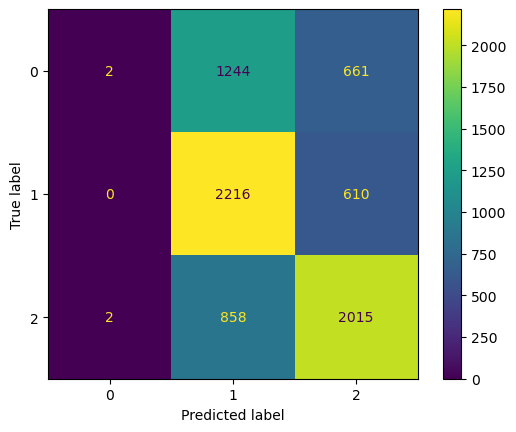

==> Model: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.17      0.00      0.00      1907
           1       0.53      0.76      0.63      2826
           2       0.60      0.75      0.67      2875

    accuracy                           0.57      7608
   macro avg       0.44      0.50      0.43      7608
weighted avg       0.47      0.57      0.49      7608



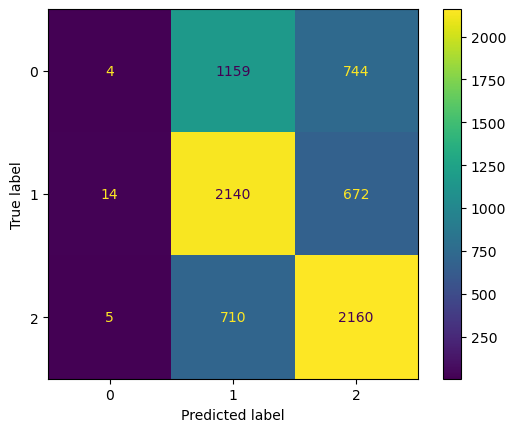

==> Model: SVM
              precision    recall  f1-score   support

           0       0.34      0.01      0.03      1907
           1       0.54      0.77      0.64      2826
           2       0.61      0.75      0.68      2875

    accuracy                           0.57      7608
   macro avg       0.50      0.51      0.45      7608
weighted avg       0.52      0.57      0.50      7608



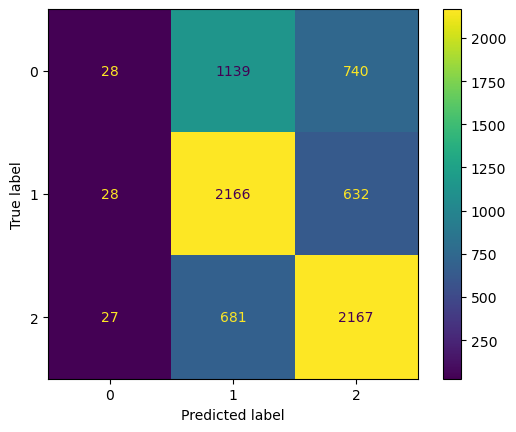

In [119]:
pipeline.model_predictions(X_test_scaled, y_test)

***
## Conclusions

***
## References

[1] https://forecastegy.com/posts/feature-importance-in-logistic-regression/